In [31]:
from google.colab import drive
import requests
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle

drive_name = '/content/drive'
drive.mount(drive_name)

drive_location = drive_name + '/My Drive/University of Toronto/4th Year/CSC412'
data_location = drive_location + '/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
def download_img(object_name):
    """
    Download .npy file for given object_name.
    object_name (str) : Name of object drawing to be downoalded. 
                        E.g., "airplane", "mouse"
    """
    url = "https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/{}.npy".format(object_name)
    myfile = requests.get(url)
    savename = data_location + '{}.npy'.format(object_name)

    if os.path.exists(data_location + '{}.npy'.format(object_name)):
        print("{}.npy file exists already".format(object_name))
    else:
        with open(savename, 'wb') as f:
            f.write(myfile.content)
            print("{}.npy file download completed".format(object_name))
            f.close()


def download_mult_objects(object_arr):
    """
    Download .npy file for multiple objects.
    object_arr (str) : e.g., ["airplane", "mouse"]
    """
    for obj in object_arr:
        download_img(obj)


def load_data(object_name):
    """
    Return Nx784 numpy array corresponding to N drawings of size 28x28.
    object_name (str) : Name of object drawing to be loaded to the memory. 
                        E.g., "airplane", "mouse"
    """
    savename = data_location + '{}.npy'.format(object_name)
    # mmap_mode='r+' this does not load everything to memory to avoid
    # out of memory issues
    data = np.load(savename, mmap_mode='r+')

    return data


def load_mult_data(object_arr):
    """
    Return len(object_arr)xNx784 numpy array corresponding to N drawings of size 28x28.
    object_arr (str) : e.g., ["airplane", "mouse"]
    """
    data_arr = []
    for obj in object_arr:
        data = load_data(obj)
        data_arr.append(data)
    return data_arr


def display_img(im_arr, img_category):
    """
    Plot im_arr.
    im_arr (numpy uint8 array): Numpy array of size (784,) to be visualized.
    img_category (str): name of object in im_arr
    """
    plt.imshow(im_arr.reshape(28,28), cmap='gray')
    plt.title(img_category)


def create_dataset(data_arr, obj_name_arr, num_samples):
    """
    """
    _, col_size = (data_arr[0]).shape
    # empty array to concatenate data
    final_arr = np.array([], dtype=np.uint8).reshape(0, col_size)
    label_arr = []

    for i in range(len(data_arr)):
        # choose num_samples randomly of each object
        index = np.random.choice(data[i].shape[0], num_samples, replace=False)
        obj_data = data_arr[i][index]
        final_arr = np.concatenate((final_arr, obj_data), axis=0)   
        # create num_sample labels and concatenate to label_arr
        obj_label = [obj_name_arr[i]]*num_samples
        label_arr.extend(obj_label)  

    return final_arr, np.array(label_arr)



In [173]:
# add or remove objects here
objects = ['mouse', 'airplane']

## Download data, running once is enough
# download_mult_objects(objects)

# load data
data = load_mult_data(objects)

# get mergedd datasets
num_samples = 2
train_dataset, train_label = create_dataset(data, objects, num_samples)


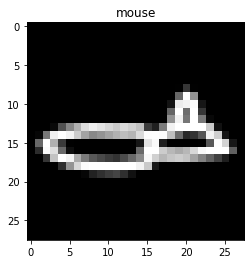

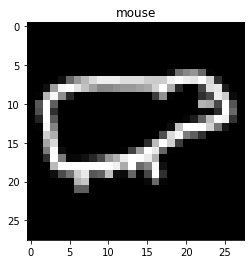

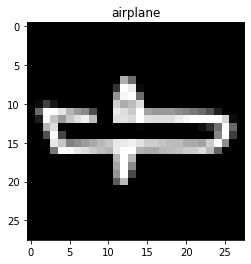

In [181]:
# display image
num_images = 3

for idx in range(num_images):
    display_img(train_dataset[idx], train_label[idx])
    plt.show()